In [1]:
from wwo_hist import retrieve_hist_data
import pandas as pd

# Step1: Call API from wwo

In [2]:
frequency = 24
start_date = '01-Jan-2019'
end_date = '31-DEC-2019'
api_key = 'aade546bef2d445d9c434203210501'
location_list = ['london']

london_2019_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for london


Currently retrieving data for london: from 2019-01-01 to 2019-01-31
Time elapsed (hh:mm:ss.ms) 0:00:00.729179
Currently retrieving data for london: from 2019-02-01 to 2019-02-28
Time elapsed (hh:mm:ss.ms) 0:00:01.265299
Currently retrieving data for london: from 2019-03-01 to 2019-03-31
Time elapsed (hh:mm:ss.ms) 0:00:01.953442
Currently retrieving data for london: from 2019-04-01 to 2019-04-30
Time elapsed (hh:mm:ss.ms) 0:00:02.750626
Currently retrieving data for london: from 2019-05-01 to 2019-05-31
Time elapsed (hh:mm:ss.ms) 0:00:03.506803
Currently retrieving data for london: from 2019-06-01 to 2019-06-30
Time elapsed (hh:mm:ss.ms) 0:00:04.065922
Currently retrieving data for london: from 2019-07-01 to 2019-07-31
Time elapsed (hh:mm:ss.ms) 0:00:04.798099
Currently retrieving data for london: from 2019-08-01 to 2019-08-31
Time elapsed (hh:mm:ss.ms) 0:00:05.499237
Currently retrieving data for london: from 2019-09-01 to 2019-09-30
Time elapsed 

In [3]:
import os
os.chdir("C:\\Users\\ChuanjiaoZong\\OneDrive - University of Bristol\\Desktop\\SDPA\\DataAnalysis")

In [4]:
df = pd.read_csv('london.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          365 non-null    object 
 1   maxtempC           365 non-null    int64  
 2   mintempC           365 non-null    int64  
 3   totalSnow_cm       365 non-null    float64
 4   sunHour            365 non-null    float64
 5   uvIndex            365 non-null    int64  
 6   moon_illumination  365 non-null    int64  
 7   moonrise           365 non-null    object 
 8   moonset            365 non-null    object 
 9   sunrise            365 non-null    object 
 10  sunset             365 non-null    object 
 11  DewPointC          365 non-null    int64  
 12  FeelsLikeC         365 non-null    int64  
 13  HeatIndexC         365 non-null    int64  
 14  WindChillC         365 non-null    int64  
 15  WindGustKmph       365 non-null    int64  
 16  cloudcover         365 non

# step2: data preperation

In [5]:
selected_columns = ['date_time','maxtempC', 'mintempC','totalSnow_cm',
                       'FeelsLikeC','HeatIndexC','location']


london_weather_df = df[selected_columns].copy()


I am focusing on 'date_time','maxtempC', 'mintempC','totalSnow_cm','FeelsLikeC','HeatIndexC','location'.

In [6]:
london_weather_df.shape

(365, 7)

In [7]:
london_weather_df

,date_time,maxtempC,mintempC,totalSnow_cm,FeelsLikeC,HeatIndexC,location
0,2019-01-01,10,4,0.0,5,8,london
1,2019-01-02,6,4,0.0,2,5,london
2,2019-01-03,6,0,0.0,2,4,london
3,2019-01-04,4,2,0.0,2,3,london
4,2019-01-05,6,2,0.0,2,4,london
...,...,...,...,...,...,...,...
360,2019-12-27,8,6,0.0,7,7,london
361,2019-12-28,9,6,0.0,6,7,london
362,2019-12-29,9,3,0.0,5,7,london
363,2019-12-30,11,7,0.0,8,9,london


In [8]:
london_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_time     365 non-null    object 
 1   maxtempC      365 non-null    int64  
 2   mintempC      365 non-null    int64  
 3   totalSnow_cm  365 non-null    float64
 4   FeelsLikeC    365 non-null    int64  
 5   HeatIndexC    365 non-null    int64  
 6   location      365 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 20.1+ KB


In [9]:
london_weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,FeelsLikeC,HeatIndexC
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,15.660274,9.709589,0.029315,11.586301,12.980822
std,6.345344,5.252215,0.394036,6.619678,5.706865
min,3.000000,-3.000000,0.000000,-3.000000,2.000000
25%,10.000000,6.000000,0.000000,6.000000,8.000000
50%,15.000000,9.000000,0.000000,11.000000,13.000000
75%,20.000000,14.000000,0.000000,17.000000,17.000000
max,36.000000,24.000000,7.200000,31.000000,31.000000


# step3: perform exploratory analysis

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [11]:
london_weather_df['diftempC'] = london_weather_df['maxtempC'] - london_weather_df['mintempC']
london_weather_df['avetempC'] = (london_weather_df['maxtempC'] + london_weather_df['mintempC'])/2
london_weather_df

,date_time,maxtempC,mintempC,totalSnow_cm,FeelsLikeC,HeatIndexC,location,diftempC,avetempC
0,2019-01-01,10,4,0.0,5,8,london,6,7.0
1,2019-01-02,6,4,0.0,2,5,london,2,5.0
2,2019-01-03,6,0,0.0,2,4,london,6,3.0
3,2019-01-04,4,2,0.0,2,3,london,2,3.0
4,2019-01-05,6,2,0.0,2,4,london,4,4.0
...,...,...,...,...,...,...,...,...,...
360,2019-12-27,8,6,0.0,7,7,london,2,7.0
361,2019-12-28,9,6,0.0,6,7,london,3,7.5
362,2019-12-29,9,3,0.0,5,7,london,6,6.0
363,2019-12-30,11,7,0.0,8,9,london,4,9.0


In [12]:

Jan_weather_df = london_weather_df[0:31]

max_temp = Jan_weather_df.maxtempC
max_temp.index

RangeIndex(start=0, stop=31, step=1)

The histogram shows the distribution of max temperature of London in 2019 Jan.

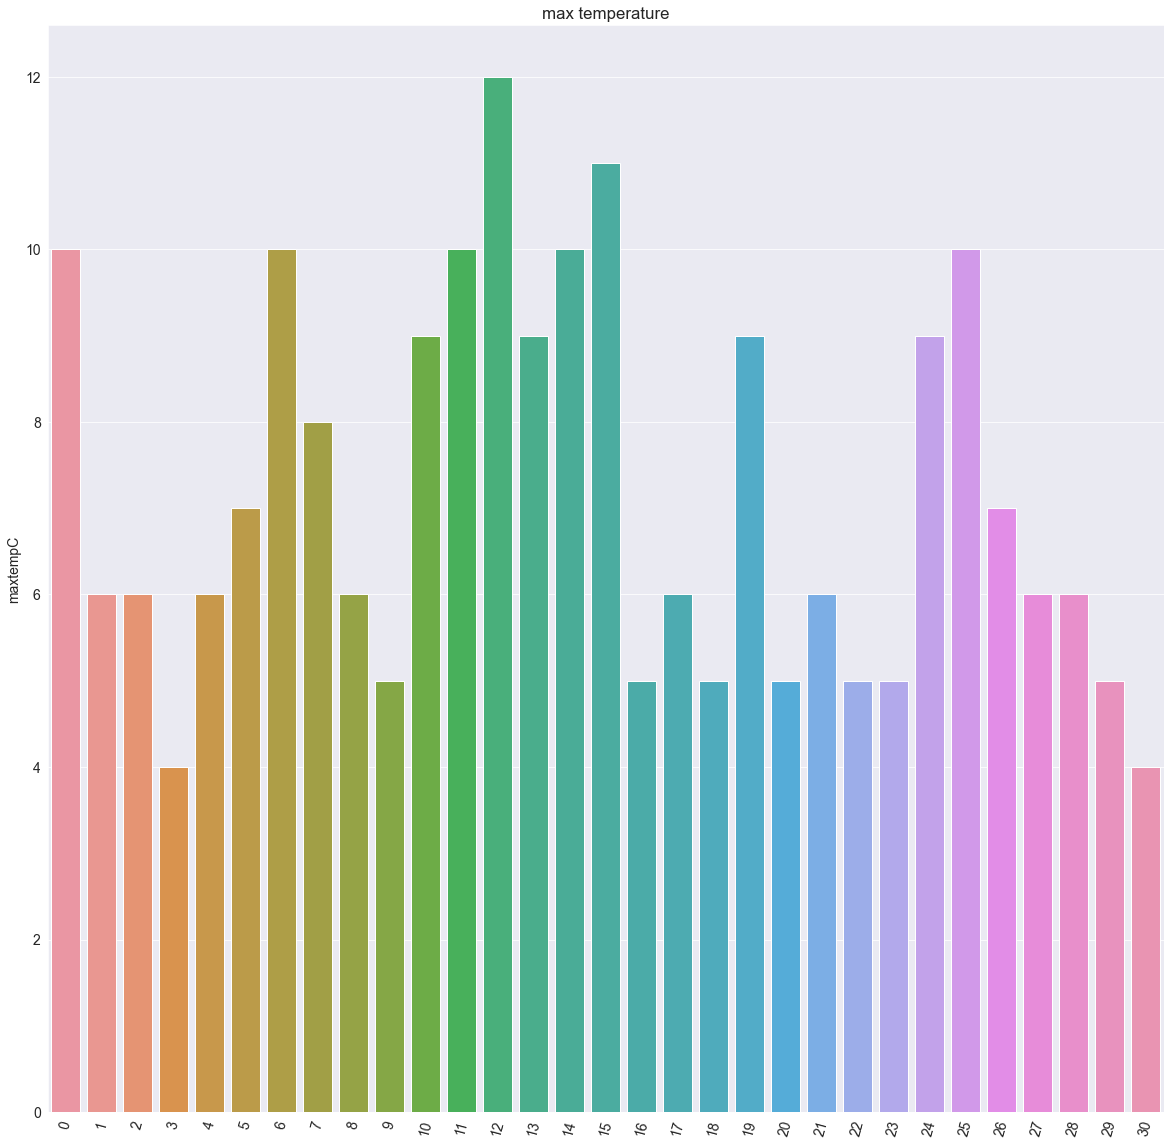

In [13]:
plt.figure(figsize=(20,20))
plt.xticks(rotation=75)
plt.title('max temperature')
sns.barplot(x=max_temp.index, y=max_temp);

The scatter plot shows assocciation between FeelslikeC and HeatIndexC.

Text(0, 0.5, 'HeatIndexC')

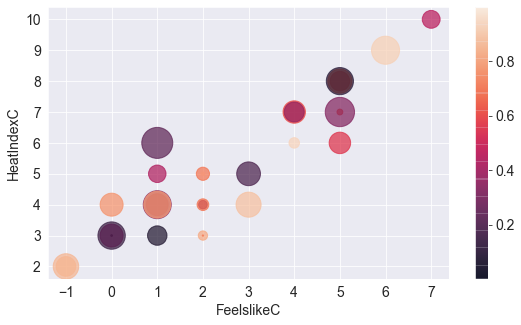

In [14]:
Jan = Jan_weather_df.set_index('date_time')
a = Jan.FeelsLikeC
b = Jan.HeatIndexC
colors = np.random.rand(len(a))
sizes = 1000*np.random.rand(len(a))
plt.scatter(x = a,y = b,s=sizes,c=colors,alpha=0.7)
plt.show
plt.colorbar()
plt.xlabel('FeelslikeC')
plt.ylabel('HeatIndexC')



The pie chart shows ratio of different groups of min temperature of London in 2019.

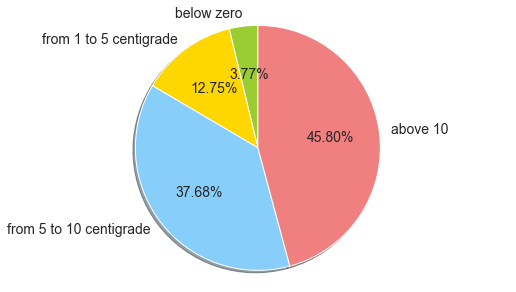

In [15]:
a = london_weather_df.loc[london_weather_df['mintempC'] <= 0 ,'mintempC']
b = london_weather_df.loc[london_weather_df['mintempC'] >0  ,'mintempC']
c = b[(b >= 1) & (b < 5)]
d = b[(b >= 5) & (b < 10)]
e = b[(b > 10)]

rate = [len(a)/len(london_weather_df.mintempC),len(c)/len(london_weather_df.mintempC),
       len(d)/len(london_weather_df.mintempC),len(e)/len(london_weather_df.mintempC)]
sizes = [x*100 for x in rate]
labels = ['below zero', 'from 1 to 5 centigrade', 'from 5 to 10 centigrade', 'above 10']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%',
         shadow=True, startangle=90)
plt.axis('equal')
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x2820f8bd490>,
 'caps': [<matplotlib.lines.Line2D at 0x2820f8bdb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2820f8bd190>],
 'medians': [<matplotlib.lines.Line2D at 0x2820f8c8250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2820f8c85b0>],
 'means': []}

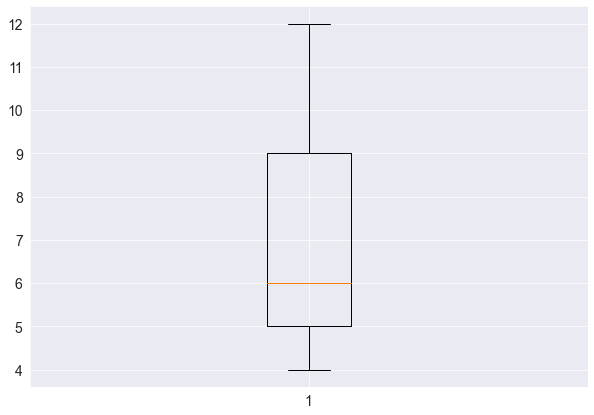

In [16]:

max_temp = Jan_weather_df.maxtempC
fig = plt.figure(figsize=(10,7))

plt.boxplot(max_temp)

In [35]:
df_london_weather_2019 = df.to_csv('london2019.csv')



# "what is the difference of the daily average temperature between 2019 and 2009?"


In [25]:
frequency = 24
start_date = '01-Jan-2009'
end_date = '31-DEC-2009'
api_key = 'aade546bef2d445d9c434203210501'
location_list = ['london']

london_2009_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)
import os
os.chdir("C:\\Users\\ChuanjiaoZong\\OneDrive - University of Bristol\\Desktop\\SDPA\\DataAnalysis")



Retrieving weather data for london


Currently retrieving data for london: from 2009-01-01 to 2009-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.559368
Currently retrieving data for london: from 2009-02-01 to 2009-02-28
Time elapsed (hh:mm:ss.ms) 0:00:02.320521
Currently retrieving data for london: from 2009-03-01 to 2009-03-31
Time elapsed (hh:mm:ss.ms) 0:00:02.756618
Currently retrieving data for london: from 2009-04-01 to 2009-04-30
Time elapsed (hh:mm:ss.ms) 0:00:03.500787
Currently retrieving data for london: from 2009-05-01 to 2009-05-31
Time elapsed (hh:mm:ss.ms) 0:00:04.188942
Currently retrieving data for london: from 2009-06-01 to 2009-06-30
Time elapsed (hh:mm:ss.ms) 0:00:04.790078
Currently retrieving data for london: from 2009-07-01 to 2009-07-31
Time elapsed (hh:mm:ss.ms) 0:00:05.517248
Currently retrieving data for london: from 2009-08-01 to 2009-08-31
Time elapsed (hh:mm:ss.ms) 0:00:06.195392
Currently retrieving data for london: from 2009-09-01 to 2009-09-30
Time elapsed 

In [26]:
df_2009 = pd.read_csv('london.csv')
df_2009['avetempC'] = (df_2009['maxtempC'] + df_2009['mintempC'])/2
df_2009['avetempC']

0     -1.5
1      2.0
2     -1.0
3     -2.0
4      0.0
      ... 
360    4.5
361    1.0
362    2.0
363    3.5
364    2.0
Name: avetempC, Length: 365, dtype: float64

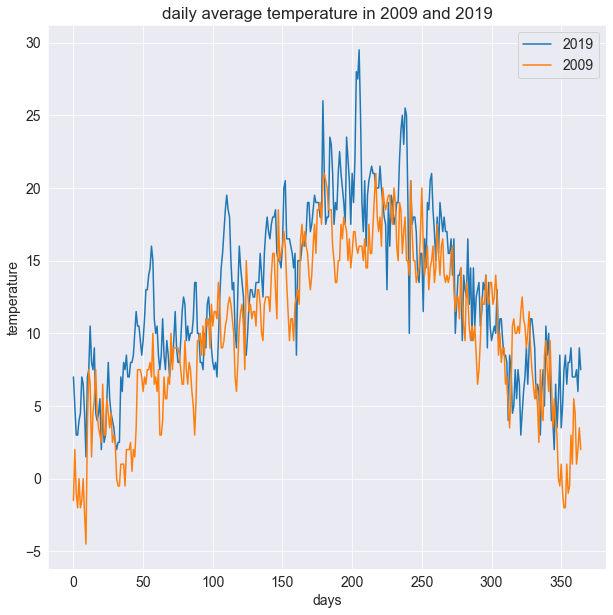

In [33]:
plt.figure(figsize=(10,10))

plt.plot(london_weather_df['avetempC'])
plt.plot(df_2009['avetempC'])
plt.xlabel('days')
plt.ylabel('temperature')
plt.title("daily average temperature in 2009 and 2019")
plt.legend(['2019', '2009'])
plt.show()






From the graph above, we can find that year 2019 is generally hotter than year 2009. The 2009 temperature do not vary a lot compare with 2019.

# Is there any correlation between 'SUNHOURS' and 'CLOUDCOVER'?


Text(0, 0.5, 'cloudcover')

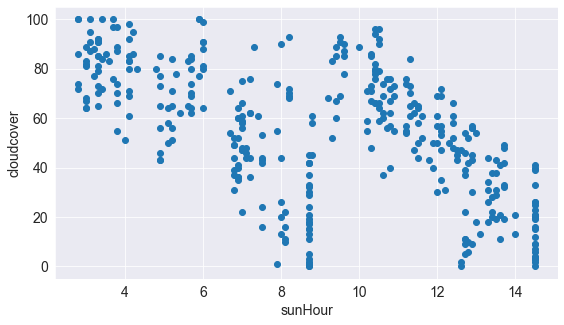

In [22]:
SUNHOURS = df['sunHour']
CLOUDCOVER = df['cloudcover']
plt.scatter(x = SUNHOURS,y = CLOUDCOVER)
plt.show
plt.xlabel('sunHour')
plt.ylabel('cloudcover')


There are some negative correlation between 'cloudCover' and 'sunHour'.However, from the graph above, there are not very strong evidence shows that the longer the sun hour, the less the time of cloud covering.

In [23]:
from scipy.stats import pearsonr

data1 = SUNHOURS
data2 = CLOUDCOVER
# # calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.578


#  Which day is biggest temperature difference in 2019?

In [20]:
import numpy as np
new_df = london_weather_df[['date_time','diftempC']]
max_diftempC = new_df.diftempC.max()
pos = np.where(new_df["diftempC"]==max_diftempC)
date = new_df.date_time.loc[pos]
date

241    2019-08-30
Name: date_time, dtype: object

Therefore,the day which has biggest temperature difference is 2019-8-30.

# What I have learnt from this project

From above weather analysis, I have learnt that London's summers are short, confortabale and warm. There are only few days which are above 28 degrees. Winters are relatively long and cold. During the year 2019, the temperature usually varies from 3 to 25.
There are positive correlation between 'HeatIndex' and 'FeelsLike', which is reasonable. Because heat index is calculated  by air temperature and relative humidity, in general, one of the importan meteorological factors that effect the 'feel temperature' is humidity. This tell us that we need to consider more factors when we are listening to weather forecast. For example, not only focusing on maximum and minimum temperature, but also we need to watch out for 'HeatIndex' ,'Humidity' and 'FeelsLike'.
The year 2019 is genarally hotter than the year 2009. I think this is related to global warming.
For the future work, I think scatter graph is very good tool to visualize the association of two variables in weather analysis.And the method of calculating daily average maxt emperature and min temperature should be stated clearly, since there different ways of calculating average in statistics, such as arithmetic mean and weighted mean. We have no idea which method is used.